## Problem statement



To predict churning out customers

We are going to implement the RandomForestClassifier to customer churn dataset and interpret churning


## Load the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
churn_data=pd.read_csv("/content/customer_churn-2.csv")

# from google.colab import drive
# drive.mount('/content/drive')

# churn_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Decision_Trees/customer_churn-2.csv")


In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Converting the Total charges column to numeric,because as you can see its original dtype is object but data is numeric

In [5]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#changing data type of total_charges from object to float
# coerce will change data type
# churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges']) #it is function in numpy

churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [7]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Missing Value Analysis

In [8]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churn_data.shape

(7043, 21)

As we can see from above output Total charges is having 11 null values ,as we don't have a appropriate TotalCharges we will be dropping the 11 null value rows in the same data table

In [10]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
churn_data.dropna(inplace=True) #--it well do permanent
# churn_data.dropna() --it wil do temp

In [12]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


As CustomerId is nowhere helping in the prediction and also it's values are not appropriate to fit in the model we will be droping the Customer ID column

In [13]:
# churn_data.drop(columns = ['customerID'])
churn_data.drop(columns = ['customerID'],inplace = True)


In [14]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [15]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Label Encoding

Encoding all the labels as numerical categories as because this kinds of string data cannot be used to fit as these are incompatible type to fit the classification model

this can be performed through label_encoder() or using the map() function.

In [16]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# churn_data['Dependents'] = label_encoder.fit_transform(churn_data['Dependents'])
# churn_data['PaperlessBilling'] = label_encoder.fit_transform(churn_data['PaperlessBilling'])
# churn_data['gender'] = label_encoder.fit_transform(churn_data['gender'])
# churn_data['PhoneService'] = label_encoder.fit_transform(churn_data['PhoneService'])


In [17]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    churn_data[column] = label_encoder.fit_transform(churn_data[column])

In [19]:
# #maping(funtion)
# churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
# churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
# churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
# churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
# churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
# churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
# churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
# churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
# churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
# churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
# churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
# churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
# churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
# churn_data['gender'] = churn_data['gender'].map({'Female': 1, 'Male': 0})
# churn_data['PhoneService'] = churn_data['PhoneService'].map({'Yes': 1, 'No': 0})



In [20]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,Yes


So now after encoding you can check that the dtypes of all the data is numerical where this data fits into any classification probelm perfecty

## Data Visualization

###### 1

Starting with visualizing how many customers have churned out and how many are still in contract with the company

In [21]:
churn_data["Churn"].value_counts(normalize=True)*100


No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

<Axes: >

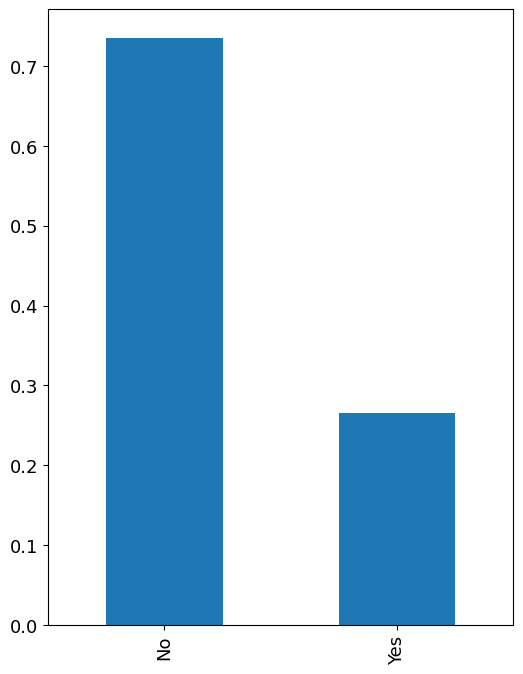

In [22]:
#for plotting this
churn_data["Churn"].value_counts(normalize=True).plot(kind='bar', figsize=(6, 8), fontsize=13)

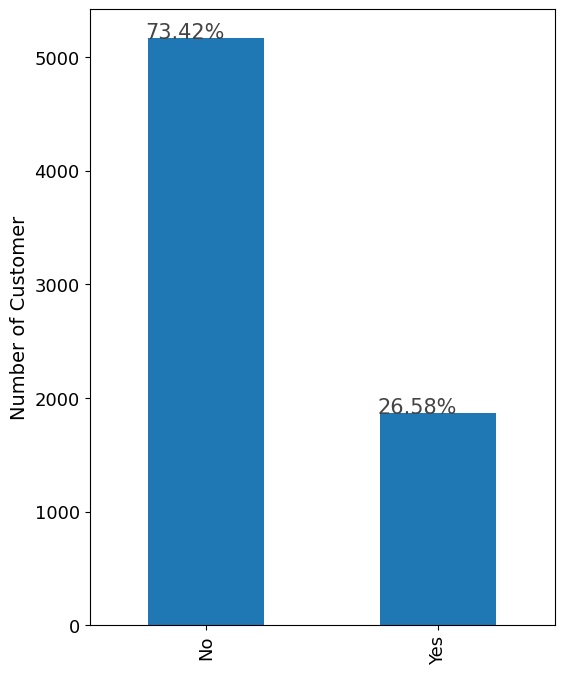

In [23]:
import matplotlib.pyplot as plt
ax = churn_data["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

from the above visualization its  clear that 26.58 % of people have churned out and 73.43% people have not churned.

##### 2

1st scatter plot

from this 1st scatter plot we can infer that , more the  tatal charge ,and higher the tenure, less the churning rate

because as from visualization the more people are churned out are the one's with less total charge and less tenure


2nd  scatter plot

from this 2nd scatter plot we can infer that , more the  montly charge ,and higher the tenure, less the churning rate.

because as from visualization the more people are churned out are the one's with less mothly charge and less tenure

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

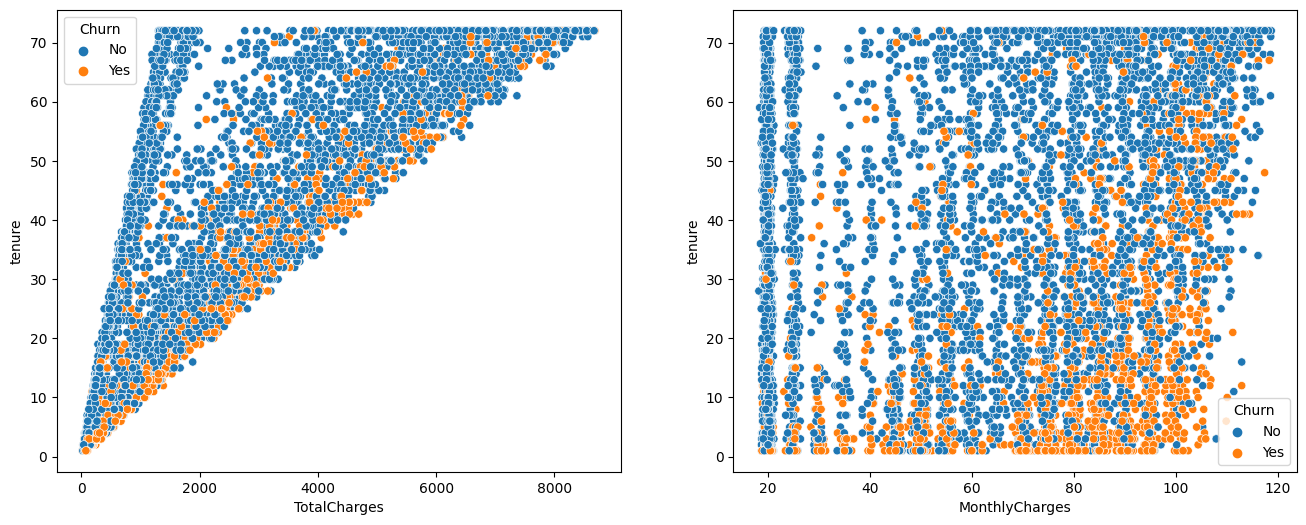

In [24]:
import seaborn as sns
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[1])

##### 3

there is same inference with Facetgrid also.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

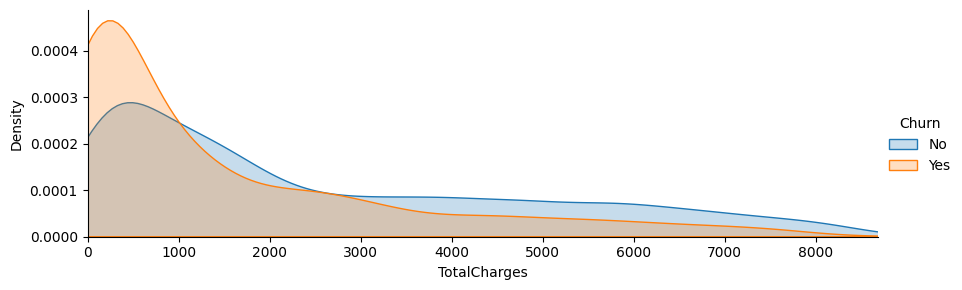

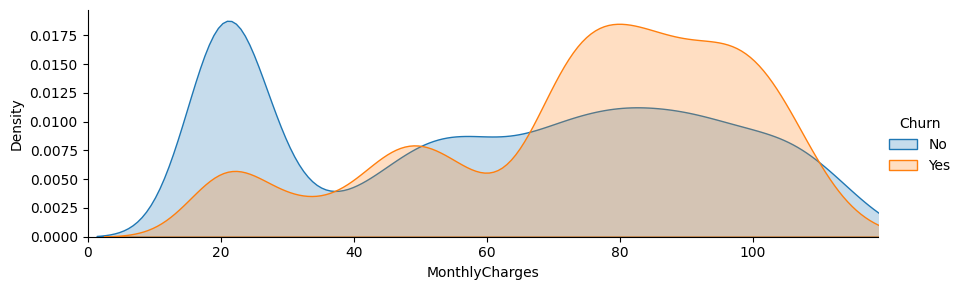

In [25]:
facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"TotalCharges",shade= True)
facet.set(xlim=(0, churn_data["TotalCharges"].max()))
facet.add_legend()

facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.set(xlim=(0, churn_data["MonthlyCharges"].max()))
facet.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


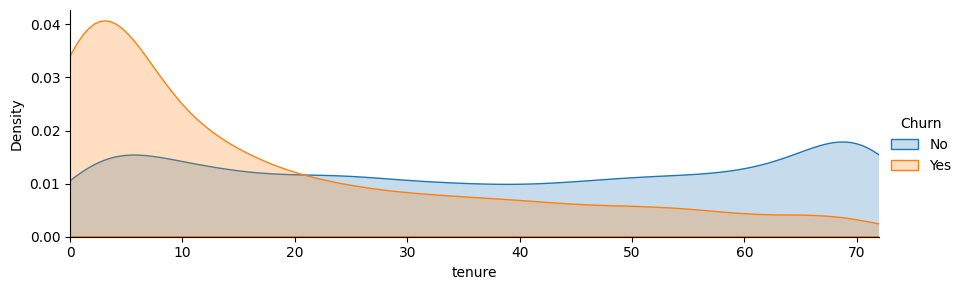

In [26]:
facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"tenure",shade= True)
facet.set(xlim=(0, churn_data["tenure"].max()))
facet.add_legend()

##### 4

from the below heatmap we can check the correlation between the features

<ipython-input-27-73f505de3337>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data.corr(), cmap="RdYlBu", annot=True, fmt=".1f")


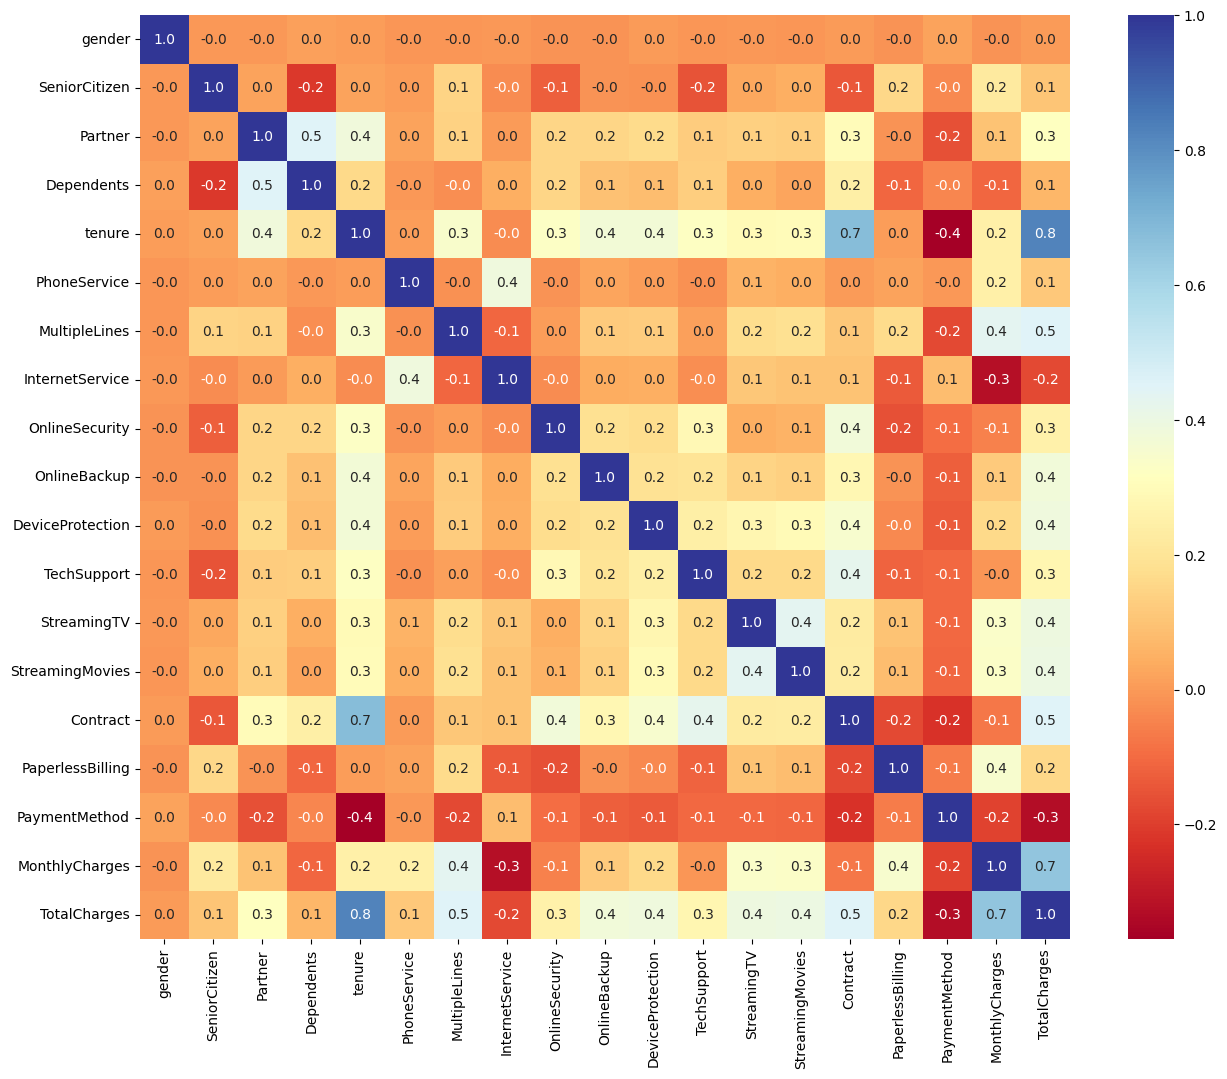

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 12))
sns.heatmap(churn_data.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

we can infer that there are hightly_corr_feature = ["OnlineBackup_No internet service", "StreamingMovies_No internet service", "StreamingTV_No internet service", "TechSupport_No internet service", "DeviceProtection_No internet service", "OnlineSecurity_No internet service"]

# Model building

Firstly we'll map the churn column with 1 and 0 instead od 0yes and no so that all the features and label  will have uniform datatype

In [28]:
#this is also label encoding
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})

In [29]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


As our main prediction is to check the churning out customers ,so we consider churn as depended data and all other features are considered as independent (features after feature selection)

In [30]:
X = churn_data.iloc[:, :-1].values
y = churn_data.iloc[:, -1].values

In [31]:
X

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        3.4645e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        6.8445e+03]])

In [32]:
y

array([0, 0, 1, ..., 0, 1, 0])

Splitting the data into train and test data ,as training data will be used for training the model and test data is for prediction.

In [33]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
x_test.shape[0]+x_train.shape[0]

7032

In [35]:
x_test.shape

(1407, 19)

In [36]:
x_train.shape

(5625, 19)

Now we will fit the data into RandomForestClassifier ,As random forest is  ensemble method .we will be importing RandomForestClassifier from sklearn's ensemble library

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)



In [39]:
#fit my model
rf1=rf.fit(x_train,y_train)

In [40]:
rf1

RandomForestClassifier(random_state=42)

Checking for prediction for the above fit model

In [41]:
y_pred=rf1.predict(x_test)

From the prediction result(predicted values) and test value(actual value ) we'll check the model efficiency

In [42]:
accuracy_score(rf1.predict(x_train),y_train)

0.9976888888888888

In [61]:

accuracy_score(y_pred,y_test)

0.7874911158493249

from the above accuracy we can infer that the model is having 78.39% accuracy that is out of 100 predictions we'll be getting 78 predictions as true prediction

# Hyper parameter tuning

**Hyper-parameters**  are parameters that define the model structure, and **tuning** hyper-parameters is the process of finding the best model structure. So that model  structure makes the model more efficient

There are many parameters which we can look into while building the randomforest model they are:

**bootstrap'/max_sample:** The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree

**'max_depth':** The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node

**'max_features':** This resembles the number of maximum features provided to each tree in a random forest.

**'min_samples_leaf':** This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node.

**'min_samples_split':** parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.

**'n_estimators':**
number of decision trees to choose while fitting the random forest model

There are two techniques for hyper parameter tuning :
    1.RandomizedSearchCV
    2.GridSearchCV

For our model we will be implementing  RandomizedSearchCV method and tune our model

So we'll select the best values for each parameter ,below code help's  us to extract the best values for each parameter

In [46]:
#we can also use gridsearchcv
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#let say auto gives 16 feature then sqrt will givw us only 4
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Steps to implement:


1.Use the random grid to search for best hyperparameters
2.First create the base model to tune
3.Random search of parameters, using 3 fold cross validation
4.search across 100 different combinations, and use all available cores
5.Fit the random search model

In [53]:
len(n_estimators)*len(max_features)*len(max_depth)*len(min_samples_split)*len(min_samples_leaf)*len(bootstrap)

4320

In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error',
                              cv = 3, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


from the above fitted model you can check the best values for each parameter across 10o folds

In [63]:
rf2.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

lets check the predictions for the model fitted after tuning

In [64]:
y_pred=rf2.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [82]:

accuracy_score(y_pred,y_test)

0.798862828713575

So from the below outup we can see there is a 1.28% change in accuracy .

In [83]:

accuracy_score(rf2.predict(x_train),y_train)

0.856

we can se decrease in accuracy of traing data

after implementation of  hyper parameter tuning to the model, we can see that there is increase in performance of the model

In [67]:
rf2.cv_results_

{'mean_fit_time': array([ 2.47087336, 10.1014452 ,  6.71728381, 13.40697336,  7.27736211,
         4.86785253,  6.96323975,  4.44579252,  7.10445285, 10.2783126 ,
         2.14902194,  5.36146188, 11.63061325,  8.97224863,  4.96547532,
        11.45058068,  4.40580686,  5.56749145, 11.9412868 ,  3.64921904,
        12.35515777, 11.63384509,  6.39750481,  9.36799033,  9.80828889,
         2.99374501, 10.33660412,  5.18322627, 12.24211502,  6.22264902,
         7.16912556,  5.57401713,  5.33007018,  3.8828934 ,  9.87044938,
         4.7240599 ,  6.50335209,  4.95406953,  3.95035903,  5.31539957,
         0.881169  ,  3.45524883,  3.62672106,  2.37564341,  1.23080357,
         5.54159848, 10.84531705,  2.57944727,  7.18319257,  4.081563  ,
        13.26091838, 12.61707322,  6.00948811,  6.35814643,  9.66687822,
         3.69891191,  7.89286311,  9.25094891,  7.95045106,  7.19224485,
         1.38510323,  1.72508971,  5.9798046 ,  7.67603874,  7.80453793,
         8.00808144, 10.67933917, 

# Model Evaluation

We'll check the feature importance of the fitted model .where feature importance helps the contribution of each and every features for the built model

In [68]:
importance = rf1.feature_importances_

In [69]:
#convert into dataframe
importance= pd.Series(importance)
importance

0     0.027480
1     0.021471
2     0.022269
3     0.019728
4     0.161040
5     0.005284
6     0.023745
7     0.027316
8     0.038653
9     0.026910
10    0.020863
11    0.045224
12    0.017009
13    0.017562
14    0.077878
15    0.025647
16    0.052757
17    0.179830
18    0.189334
dtype: float64

In [70]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [72]:
cols = list(churn_data.drop('Churn',axis=1).columns)
df['Feature']=cols
df['Importance']=importance
df

,Feature,Importance
0,gender,0.027480
1,SeniorCitizen,0.021471
2,Partner,0.022269
3,Dependents,0.019728
4,tenure,0.161040
5,PhoneService,0.005284
6,MultipleLines,0.023745
7,InternetService,0.027316
8,OnlineSecurity,0.038653
9,OnlineBackup,0.026910


In [73]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
18,TotalCharges,0.189334
17,MonthlyCharges,0.179830
4,tenure,0.161040
14,Contract,0.077878
16,PaymentMethod,0.052757
11,TechSupport,0.045224
8,OnlineSecurity,0.038653
0,gender,0.027480
7,InternetService,0.027316
9,OnlineBackup,0.026910


<Axes: xlabel='Feature', ylabel='Importance'>

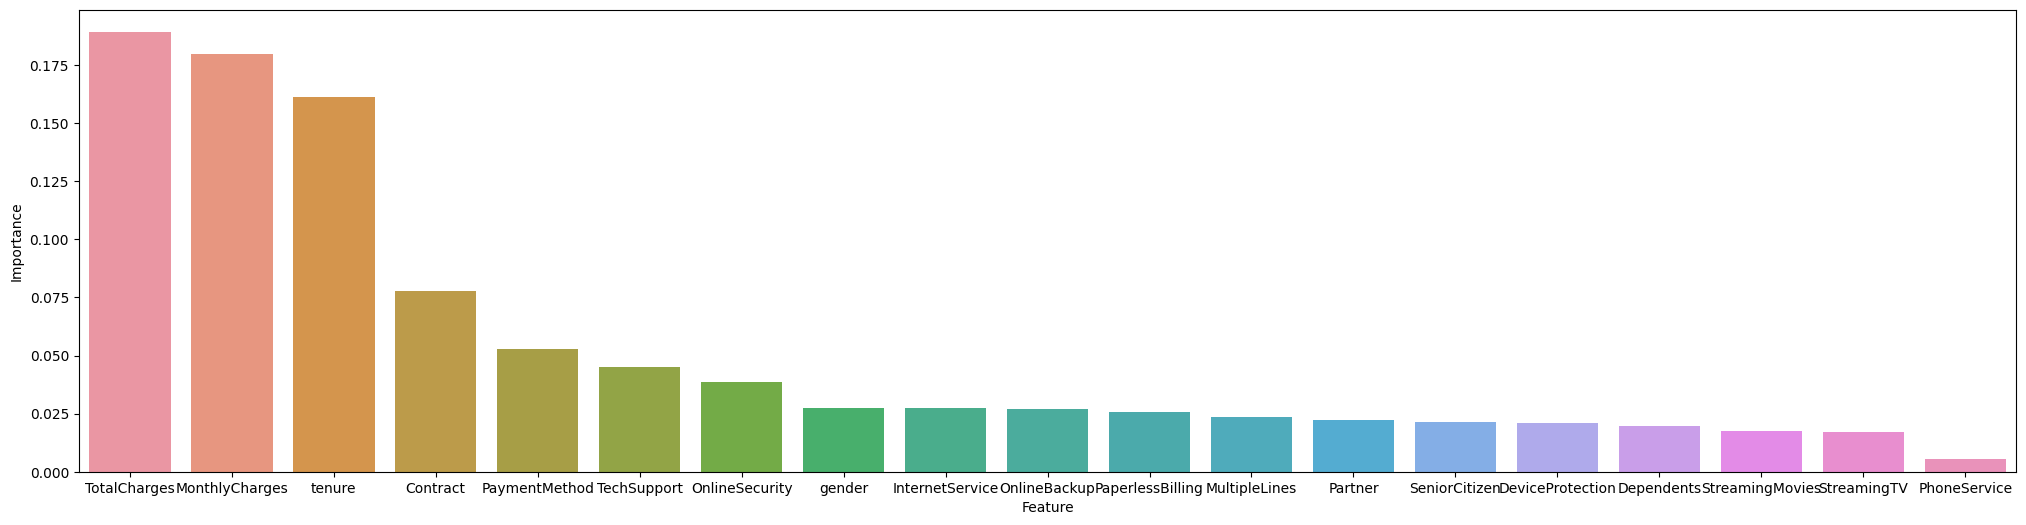

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)

From the above  plot we can infer that there is only few colums which have more contribution for prediction

### classification_report


classification_report helps us to evaluate the model

There are four ways to check the predictions
True Negative: the case was negative and predicted negative
True Positive: the case was positive and predicted positive
False Negative: the case was positive but predicted negative
False Positive: the case was negative but predicted positive



Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)


F1 score:- What percent of positive predictions were correct
F1 score = 2*(Recall * Precision) / (Recall + Precision)

Support:-Support is the number of actual occurrences of the class in the specified dataset

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [79]:
import matplotlib.pyplot as plt


In [ ]:
(rf2.predict(x_train),y_train)
accuracy_score(y_pred,y_test)

In [80]:
def plot_confusionmatrix(y_train_pred,y_train,label):
    print(f'{label} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

Test Data Confusion matrix


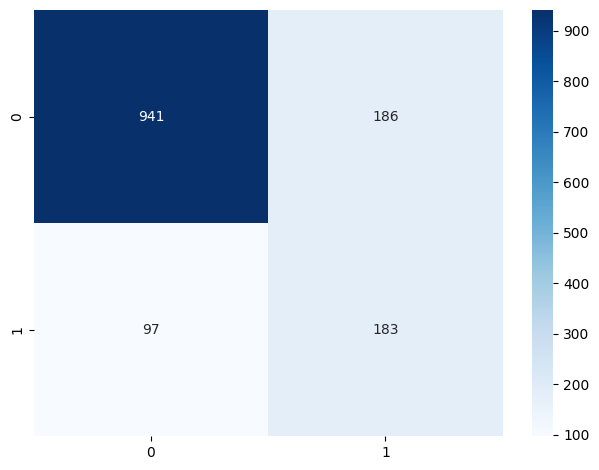

In [91]:
plot_confusionmatrix(y_pred,y_test,label='Test Data')

Train Data Confusion matrix


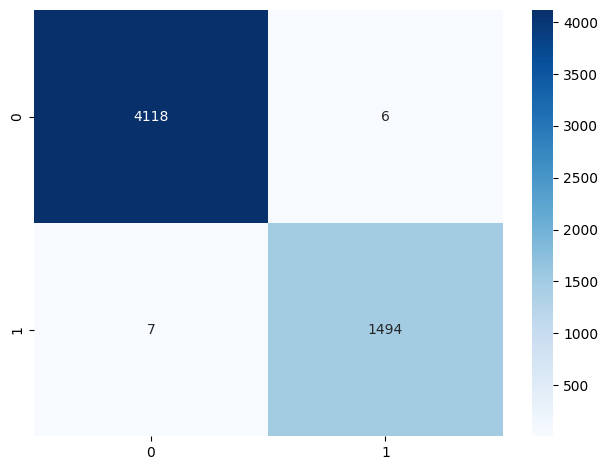

In [97]:
plot_confusionmatrix(rf1.predict(x_train),y_train,label='Train Data rf1')

Train Data rf2 Confusion matrix


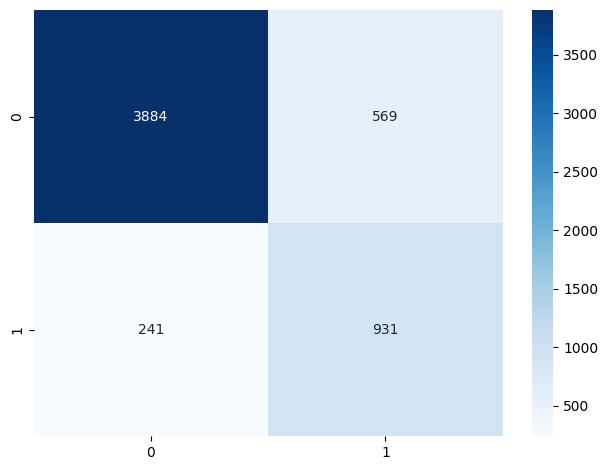

In [102]:
plot_confusionmatrix(rf2.predict(x_train),y_train,label='Train Data rf2')

In [75]:
from sklearn.metrics import classification_report

In [98]:
#testing data
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1127
           1       0.50      0.65      0.56       280

    accuracy                           0.80      1407
   macro avg       0.70      0.74      0.72      1407
weighted avg       0.82      0.80      0.81      1407



In [99]:
#training data before hyper parameter tuning
print(classification_report(rf1.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4124
           1       1.00      1.00      1.00      1501

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



In [101]:
# training data after hyperparameter tuning
print(classification_report(rf2.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      4453
           1       0.62      0.79      0.70      1172

    accuracy                           0.86      5625
   macro avg       0.78      0.83      0.80      5625
weighted avg       0.87      0.86      0.86      5625



so from classification_report we can evaluate the model performence in micro level